# Clustering

As técnicas de clusterização são muito importantes para termos *insights* sobre os dados disponíveis. Mesmo sem uma classificação exata dos dados, é possível que possamos tirar conclusões interessantes e reveladoras. 
<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_linkage_comparison_0011.png" alt="Fonte: Scikit-learn" width="500"/>

Assim, iremos utilizar os dados do [**Cartola FC**](https://globoesporte.globo.com/cartola-fc/) disponíveis [aqui](https://github.com/henriquepgomide/caRtola) para tentarmos agrupar os jogadores. Os dados são os valores do **Cartola FC** durate os anos de 2014 até 2017.

**Iremos utilizar a versão dos dados disponíveis nesse repositório que já estão [limpos e prontos para análise](https://github.com/henriquepgomide/caRtola/blob/master/data/README.md#dados_agregados_limposcsv).**

## Descrição dos Dados

De acordo com o [fonte dos dados](https://github.com/henriquepgomide/caRtola/blob/master/data/README.md), no total são **17567** instancias e **77** características. Assim, cada linha da base de dados corresponde a uma rodada de uma jogador e as colunas as suas caracteríticas nessa rodada. Para uma visão completa de todas as 77 característica dê uma olhada na fonte, mas abaixo estão alguns dos atributos.

| Características | Descrição          |
|-----------------|--------------------|
| Pontos          | pontuação do jogador                                      |
| PontosMedia     | média da pontuação do jogador                             |
| Preco           | preço do jogador                                          |
| ...             | ...                                                       |
| FS              | faltas sofridas                                           |
| PE              | passes errados                                            |
| A               | assistências                                              |
| FT              | finalizações na trave                                     |
| FD              | finalizações defendidas                                   |
| FF              | finalizações para fora                                    |
| G               | gols                                                      |
| ano             | ano dos dados                                             |
|...              |...                                                        |

## Visualização dos Dados
Inicialmente, vamos importar os dados e visualizá-los.

In [1]:
# imports
import pandas as pd 
data = pd.read_csv('dados_agregados_limpos.csv')
# brief look at the data
print(data.shape)
data.head(10)

(17567, 77)


,A,Apelido,AtletaID,CA,CV,ClubeID,DD,DP,FC,FD,...,away.score.x,dia,home.attack,home.defend,home.score.x,mes,pred.away.score,pred.home.score,risk_points,variable
0,0.0,Juan,36540,1.0,0.0,Internacional,0.0,0.0,2.0,0.0,...,0.0,19.0,0.0,0.0,1.0,4.0,0.0,0.0,1.000000,home.team
1,0.0,Juan,36540,0.0,0.0,Internacional,0.0,0.0,2.0,1.0,...,2.0,27.0,0.0,0.0,2.0,4.0,0.0,0.0,1.000000,away.team
2,0.0,Juan,36540,1.0,0.0,Internacional,0.0,0.0,2.0,0.0,...,1.0,4.0,0.0,0.0,2.0,5.0,0.0,0.0,1.000000,home.team
3,0.0,Juan,36540,0.0,0.0,Internacional,0.0,0.0,0.0,1.0,...,1.0,10.0,0.0,0.0,2.0,5.0,0.0,0.0,1.000000,home.team
4,0.0,Juan,36540,1.0,0.0,Internacional,0.0,0.0,5.0,0.0,...,0.0,18.0,0.0,0.0,0.0,5.0,0.0,0.0,1.000000,away.team
5,0.0,Juan,36540,0.0,0.0,Internacional,0.0,0.0,0.0,0.0,...,3.0,25.0,0.0,0.0,1.0,5.0,0.0,0.0,1.000000,home.team
6,0.0,Juan,36540,0.0,0.0,Internacional,0.0,0.0,1.0,0.0,...,0.0,28.0,0.0,0.0,2.0,5.0,0.0,0.0,1.000000,home.team
7,0.0,Juan,36540,0.0,0.0,Internacional,0.0,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,6.0,0.0,0.0,3.226298,away.team
8,0.0,Juan,36540,0.0,0.0,Internacional,0.0,0.0,0.0,0.0,...,1.0,17.0,0.0,0.0,2.0,7.0,0.0,0.0,3.195153,away.team
9,1.0,Juan,36540,0.0,0.0,Internacional,0.0,0.0,0.0,0.0,...,0.0,20.0,0.0,0.0,4.0,7.0,0.0,0.0,3.971580,home.team


De fato, podemos notar que temos 77 atributos e 17567 instancias.

## Análises
Para realizarmos a nossa análise, temos que ter algumas perguntas para serem respondidas. As perguntas serão elaboradas nos tópicos mais adiante. 

Assim, duas análises serão realizadas utilizando esses dados:
- Posição Ideal
- Melhores Times

### Posições Ideal

Considere que um técnico está em dúvida sobre qual posição ele deveria escalar um dado jogador. Assim, queremos saber **"Qual a posição ideal de uma jogador segundo suas estastísticas?"**. Para isso, iremos **agrupar** os jogadores de acordo com as suas **métricas** e verificar quais as posições estão mais associadas a esses conjuntos.

Antes, vamos modificar os dados iniciais de forma que cada linha represente o desempenho de um jogador na temporada (no caso o ano de 2017). Além disso, para apenas **estastísticas numéricas** relacionadas as rodadas daquele ano serão utilizadas, e será removida a posição de técnico.

In [2]:
# Filter 2017 season and Remove 'tec' from columns 'Posicao'
data_2017 = data[(data['ano'] == 2017) & (data['Posicao'] != 'tec')]

# Non Numeric statistic columns
columns = ['AtletaID','FS', 'PE', 'A', 'FT', 'FD', 'FF', 'G', 'I', 'PP', 'RB', 'FC', 'GC', 'CA', 'CV', 'SG', 'DD', 'DP', 'GS', 'Preco']

# Actual Position
data_positions = data_2017.groupby(by=['AtletaID']).max()['Posicao']

# Filters numeric values in the season 
data_2017_players = data_2017[columns].groupby(by=['AtletaID']).mean()

print(data_2017_players.shape)
print(len(data_positions))
data_2017_players.head()

(696, 19)
696


,FS,PE,A,FT,FD,FF,G,I,PP,RB,FC,GC,CA,CV,SG,DD,DP,GS,Preco
AtletaID,,,,,,,,,,,,,,,,,,,
36540,0.538462,1.076923,0.153846,0.076923,0.230769,0.461538,0.0,0.000000,0.0,1.461538,0.769231,0.0,0.384615,0.0,0.230769,0.0,0.0,0.0,6.480769
36612,0.727273,1.181818,0.181818,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.454545,1.272727,0.0,0.090909,0.0,0.272727,0.0,0.0,0.0,7.266364
37604,0.611111,2.277778,0.000000,0.055556,0.111111,0.000000,0.0,0.000000,0.0,0.722222,0.777778,0.0,0.222222,0.0,0.277778,0.0,0.0,0.0,4.270556
37607,0.785714,2.857143,0.142857,0.000000,0.214286,0.857143,0.0,0.214286,0.0,1.357143,0.785714,0.0,0.285714,0.0,0.000000,0.0,0.0,0.0,5.448571
37608,0.400000,2.200000,0.000000,0.000000,0.200000,0.000000,0.0,0.000000,0.0,1.400000,0.400000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,3.504000


Assim, ficamos com um total de **696 atletas** e o total de **19 estatísticas** ao longo da temporada.

### Redimensionar os Atributos
Antes de aplicarmos os algoritmos de clusterização, devemos reduzir a escala dos atributos para que cada um tenha uma influência uniforme. Para isso, importamos e aplicamos a classes `Normalize` do `scikit-learn`.


In [3]:
# Imports
from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer

# Scaler
scaler = Normalizer()
scaled_data = scaler.fit_transform(data_2017_players)


### KMeans
Agora podemos aplicar o algoritmo *KMeans* para um total esperado de 5 grupos que representam as 5 posições dos jogadores.
- Goleiro
- Zagueiro
- Lateral
- Meia
- Atacante

In [4]:
# Imports
from sklearn.cluster import KMeans

# Model with 5 clusters
kmeans_2017 = KMeans(n_clusters=5, random_state=42)

# Model grouping
labels = kmeans_2017.fit_predict(scaled_data)

Podemos usar a **Matriz de Confusão** para avaliarmos o resultado.

In [5]:

# Creates a Dataframe for the possible positions
pos_df = pd.DataFrame({'labels':labels, 'position':data_positions})

ct = pd.crosstab(pos_df['labels'], pos_df['position'])
ct

position,ata,gol,lat,mei,zag
labels,,,,,
0,57,1,46,97,32
1,20,0,17,45,10
2,0,44,0,0,0
3,12,0,6,12,8
4,89,4,34,98,64


Podemos ver que com exceção do **Goleiro**, os dados não foram suficientes para conseguirmos separar os jogadores entre suas respectivas posições. Ou ainda, que os jogadores de diferentes posições possuem métricas similares, como fica nítido nas posições de **Atacante/Meia**.

### t-SNE
Apesar do problema ter 18 dimensões, podemos usar técnicas para tentarmos visualizar o resultado em gráficos bidimensionais. Umas dessas técnicas é *t-SNE* e iremos aplicá-la abaixo.

In [12]:
# Labels
labels = pos_df['position'].astype('category').cat.codes

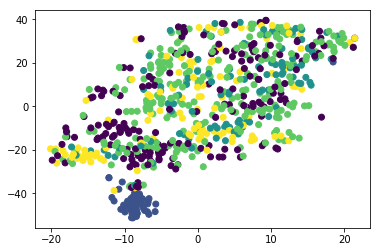

In [13]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# TSNE model
model = TSNE(learning_rate=100)
transformed = model.fit_transform(scaled_data)

xs = transformed[:, 0]
ys = transformed[:, 1]
plt.scatter(xs, ys, c=labels)

Pode-se notar que os dados são bastante sobrepostos, o que corrobora com os resultados obtidos no **KMeans**.

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

mergins = linkage(scaled_data, method='complete')

dendrogram(mergins,
           labels=pos_df['position'].values,
           leaf_rotation=90,
           leaf_font_size=6)
plt.show()